In [2]:
import numpy as np                  
import  pandas as pd

from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve

from sklearn import naive_bayes
from sklearn.preprocessing import  Imputer

In [3]:
#定义绘制学习曲线的函数
def plot_learning_curve(estimator,title, X, y, ax, ylim=None, cv=3, n_jobs=None):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y,cv=cv,n_jobs=n_jobs)
    ax.set_title(title)
    if ylim is not None:
        ax.set_ylim(*ylim)
    ax.set_xlabel("Training examples")
    ax.set_ylabel("Score")
    ax.grid() 
    ax.plot(train_sizes, np.mean(train_scores, axis=1), 'o-' , color="r",label="Training score")
    ax.plot(train_sizes, np.mean(test_scores, axis=1), 'o-' , color="g",label="Test score")
    ax.legend(loc="best")
    return ax

In [4]:
def classify(model,x_train,y_train,x_test,y_test):
    from sklearn.metrics import classification_report
    target_names = ['female', 'male']
    model.fit(x_train,y_train)              #训练数据
    y_pred=model.predict(x_test)
    print(classification_report(y_test, y_pred, target_names=target_names, digits=6))

In [5]:
#防止报错
warnings.filterwarnings('ignore')
#读取数据
voice = pd.read_csv('voice.csv')
#替换文本
le = preprocessing.LabelEncoder()               
voice["label"] = le.fit_transform(voice["label"])

voice[:]=preprocessing.MinMaxScaler().fit_transform(voice)

train, test = train_test_split(voice, test_size=0.3) #7：3划分训练集和数据集

#使用所有的变量来训练
x_train = train.iloc[:,:-1]
y_train = train["label"]
x_test = test.iloc[:,:-1]
y_test = test["label"]

#只使用四个变量来训练
x_train1 = train[["meanfun","IQR","Q25","sd"]]
y_train1 = train["label"]
x_test1 = test[["meanfun","IQR","Q25","sd"]]
y_test1 = test["label"]

In [6]:
voice.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.096419,0.473409,0.084125,0.060063,0.204956,0.254828,0.367853,0.208279,0.635798,0.564526,...,0.096419,0.157706,0.030501,0.981526,0.000000,0.006452,0.000000,0.000000,0.000000,1.0
1,0.125828,0.505075,0.116900,0.077635,0.215683,0.246961,0.644279,0.483766,0.630964,0.591578,...,0.125828,0.287642,0.031140,0.834600,0.000407,0.006452,0.002144,0.002146,0.056449,1.0
2,0.179222,0.675536,0.102873,0.034284,0.385912,0.457148,0.885255,0.782275,0.442738,0.548382,...,0.179222,0.236945,0.030264,0.954963,0.000060,0.006452,0.000357,0.000358,0.049885,1.0
3,0.528261,0.554611,0.587559,0.389906,0.715802,0.407358,0.031549,0.001613,0.923261,0.856457,...,0.528261,0.183442,0.041287,0.834600,0.065659,0.006452,0.025375,0.025393,0.265043,1.0
4,0.452195,0.627209,0.454272,0.317627,0.707515,0.474474,0.027742,0.001732,0.958736,0.926348,...,0.452195,0.279190,0.036829,0.929285,0.238994,0.006452,0.250536,0.250715,0.223380,1.0


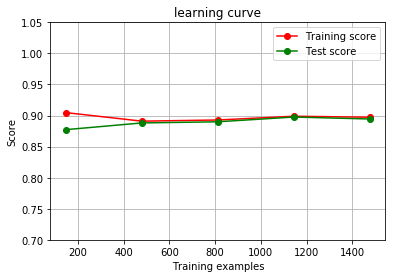

             precision    recall  f1-score   support

     female   0.892340  0.888660  0.890496       485
       male   0.884615  0.888412  0.886510       466

avg / total   0.888555  0.888538  0.888543       951



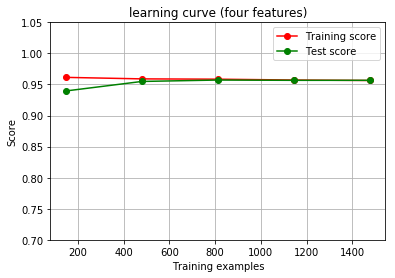

             precision    recall  f1-score   support

     female   0.974895  0.960825  0.967809       485
       male   0.959831  0.974249  0.966986       466

avg / total   0.967514  0.967403  0.967406       951



In [8]:
model=naive_bayes.GaussianNB()
plot_learning_curve(model, "learning curve", x_train , y_train , 
                    ax=plt.gca(), ylim = [0.7, 1.05],n_jobs=20, cv=3)
plt.show()
classify(model,x_train,y_train,x_test,y_test)

model=naive_bayes.GaussianNB()
plot_learning_curve(model, "learning curve (four features)", x_train1 , 
                    y_train1 , ax=plt.gca(), ylim = [0.7, 1.05],n_jobs=20, cv=3)
plt.show()
classify(model,x_train1,y_train1,x_test1,y_test1)